In [1]:
import datetime # для работы со временем 

import numpy as np # уже знакомые библиотеки
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Упражнение 1

In [3]:
from pandas.tseries.holiday import AbstractHolidayCalendar, Holiday, nearest_workday, EasterMonday
from pandas.tseries.offsets import DateOffset, Day

pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Работа с данными на Python/Calendar.csv')

In [5]:
df.set_index('Год/Месяц',inplace=True)

In [6]:
df.head()

,Январь,Февраль,Март,Апрель,Май,Июнь,Июль,Август,Сентябрь,Октябрь,Ноябрь,Декабрь,Всего рабочих дней,Всего праздничных и выходных дней,Количество рабочих часов при 40-часовой рабочей неделе,Количество рабочих часов при 36-часовой рабочей неделе,Количество рабочих часов при 24-часовой рабочей неделе
Год/Месяц,,,,,,,,,,,,,,,,,
1999,"1,2,3,4,6*,7,9,10,16,17,23,24,30,31","6,7,13,14,20,21,27,28","6,7,8,13,14,20,21,27,28","3,4,10,11,17,18,24,25,30*","1,2,3,4,8,9,10,15,16,22,23,29,30","5,6,11*,12,13,14,19,20,26,27","3,4,10,11,17,18,24,25,31","1,7,8,14,15,21,22,28,29","4,5,11,12,18,19,25,26","2,3,9,10,16,17,23,24,30,31","6,7,8,13,14,20,21,27,28","4,5,11,12,13,18,19,25,26,31*",251,114,2004,1807.2,1204.8
2000,"1,2,3,4,6*,7,8,9,15,16,22,23,29,30","5,6,12,13,19,20,26,27","4,5,7*,8,11,12,18,19,25,26","1,2,8,9,15,16,22,23,29,30","1,2,6,7,8*,9,13,14,20,21,27,28","3,4,10,11,12,17,18,24,25","1,2,8,9,15,16,22,23,29,30","5,6,12,13,19,20,26,27","2,3,9,10,16,17,23,24,30","1,7,8,14,15,21,22,28,29","4,5,7,11,12,18,19,25,26","2,3,9,10,11*,12,16,17,23,24,30,31",250,116,1995,1800.0,1200.0
2001,"1,2,6,7,8,13,14,20,21,27,28","3,4,10,11,17,18,24,25","3,4,7*,8,10,11,17,18,24,25,31","1,7,8,14,15,21,22,28,29,30*","1,2,5,6,8*,9,12,13,19,20,26,27","2,3,9,10,11*,12,16,17,23,24,30","1,7,8,14,15,21,22,28,29","4,5,11,12,18,19,25,26","1,2,8,9,15,16,22,23,29,30","6,7,13,14,20,21,27,28","3,4,6*,7,10,11,17,18,24,25","1,2,8,9,12,15,16,22,23,29,30",251,114,2001,1807.2,1204.8
2002,"1,2,5,6,7,12,13,19,20,26,27","2,3,9,10,16,17,22*,23,24,25","2,3,7*,8,9,10,16,17,23,24,30,31","6,7,13,14,20,21,28,30*","1,2,3,4,5,8*,9,10,11,12,19,25,26","1,2,8,9,11*,12,15,16,22,23,29,30","6,7,13,14,20,21,27,28","3,4,10,11,17,18,24,25,31","1,7,8,14,15,21,22,28,29","5,6,12,13,19,20,26,27","2,3,6*,7,8,9,16,17,23,24,30","1,7,8,11*,12,13,14,21,22,28,29,31*",250,115,1992,1792.0,1192.0
2003,"1,2,3,5*,6,7,11,12,18,19,25,26","1,2,8,9,15,16,22,23,24","1,2,7*,8,9,10,15,16,22,23,29,30","5,6,12,13,19,20,26,27,30*","1,2,3,4,8*,9,10,11,17,18,24,25,31","1,7,8,11*,12,13,14,15,22,28,29","5,6,12,13,19,20,26,27","2,3,9,10,16,17,23,24,30,31","6,7,13,14,20,21,27,28","4,5,11,12,18,19,25,26","1,2,6*,7,8,9,15,16,22,23,29,30","6,7,11*,12,13,14,20,21,27,28,31*",250,115,1992,1792.0,1192.0


In [7]:
# Формирую список праздников
holidays = []
for year in df.index:
    for month in df.columns[:-5]:
        holidays.extend([pd.Timestamp(datetime.datetime(int(year), df.columns.get_loc(month) + 1, int(day)))\
                         for day in df.loc[year][month].replace('*', '').replace('+', '').split(',')])

In [8]:
# Кастомизирую календарь
class RussianBusinessCalendar(AbstractHolidayCalendar):
    start_date = datetime.datetime(1999, 1, 1)
    end_date = datetime.datetime(2025, 12, 31)

    
russian_busday = pd.offsets.CustomBusinessDay(weekmask='Mon Tue Wed Thu Fri', 
                                              calendar=RussianBusinessCalendar(),
                                              holidays = holidays)

In [100]:
# Создаю наименования столбцов и индекс дат для итогового датафрейма
columns = ['Выходной', 'Праздник', 'Предпраздничный рабочий день', 'Последний день месяца',\
          'Последний рабочий день месяца', 'Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс', 'Январь',\
           'Февраль', 'Март', 'Апрель', 'Май', 'Июнь', 'Июль', 'Август', 'Сентябрь', 'Октябрь',\
           'Ноябрь', 'Декабрь', 'Предновогодний выходной день']
dti = pd.date_range(start='2013-03-25', end='2020-01-10', freq='D')

In [101]:
# Создаю датафрейм
result_df = pd.DataFrame(index=dti, columns=columns)

In [102]:
# Заполняю единицами и нулями столбцы датафрейма
for date in result_df.index:
    result_df['Пн'][date] = int(date.day_name() == 'Monday')
    result_df['Вт'][date] = int(date.day_name() == 'Tuesday')
    result_df['Ср'][date] = int(date.day_name() == 'Wednesday')
    result_df['Чт'][date] = int(date.day_name() == 'Thursday')
    result_df['Пт'][date] = int(date.day_name() == 'Friday')
    result_df['Сб'][date] = int(date.day_name() == 'Saturday')
    result_df['Вс'][date] = int(date.day_name() == 'Sunday')
    result_df['Январь'][date] = int(date.month == 1)
    result_df['Февраль'][date] = int(date.month == 2)
    result_df['Март'][date] = int(date.month == 3)
    result_df['Апрель'][date] = int(date.month == 4)
    result_df['Май'][date] = int(date.month == 5)
    result_df['Июнь'][date] = int(date.month == 6)
    result_df['Июль'][date] = int(date.month == 7)
    result_df['Август'][date] = int(date.month == 8)
    result_df['Сентябрь'][date] = int(date.month == 9)
    result_df['Октябрь'][date] = int(date.month == 10)
    result_df['Ноябрь'][date] = int(date.month == 11)
    result_df['Декабрь'][date] = int(date.month == 12)
    result_df['Последний день месяца'][date] = int(date.is_month_end)    

In [103]:
# Формирую объект, содержащий только рабочие дни 2021 года
bdti = pd.bdate_range('2013-03-25', '2020-01-10', freq='C', weekmask='Mon Tue Wed Thu Fri', holidays=holidays)

In [104]:
# Заполняю единицами и нулями столбцы Праздник и Выходной
for date in result_df.index:
    result_df['Выходной'][date] = int(date not in bdti)
    result_df['Праздник'][date] = int((date not in bdti) and\
                                      (date.day_name() not in ('Saturday', 'Sunday')) or\
                                      ((date.month_name() == 'January') and (date.day in range(11))))

In [105]:
# Заполняю единицами и нулями столбец Предпраздничный рабочий день
preholidays = set()
for date in result_df[result_df['Праздник'] == 1].index:
    preholidays.add(date - russian_busday)

for date in preholidays:
    if date in dti:
        result_df['Предпраздничный рабочий день'][date] = 1
result_df['Предпраздничный рабочий день'].fillna(0, inplace = True)

In [ ]:
# Заполняю единицами и нулями столбец Последний рабочий день месяца
lastbusdays = set()
for date in result_df[result_df['Последний день месяца'] == 1].index:
    lastbusdays.add(date - russian_busday)

for date in lastbusdays:
    result_df['Последний рабочий день месяца'][date] = 1
result_df['Последний рабочий день месяца'].fillna(0, inplace = True)

In [ ]:
# Заполняю единицами и нулями столбец Предновогодний выходной день
for date in result_df.index[result_df.index.is_year_start]:
    while True:
        date -= pd.DateOffset(days=1)
        if result_df['Выходной'][date] == 1:
            break
    result_df['Предновогодний выходной день'][date] = 1

result_df['Предновогодний выходной день'].fillna(0, inplace = True)

In [122]:
result_df.head(15)

,Выходной,Праздник,Предпраздничный рабочий день,Последний день месяца,Последний рабочий день месяца,Пн,Вт,Ср,Чт,Пт,Сб,Вс,Январь,Февраль,Март,Апрель,Май,Июнь,Июль,Август,Сентябрь,Октябрь,Ноябрь,Декабрь,Предновогодний выходной день
2013-03-25,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2013-03-26,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2013-03-27,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2013-03-28,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2013-03-29,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2013-03-30,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2013-03-31,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
2013-04-01,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2013-04-02,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2013-04-03,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


### Упражнение 2

In [188]:
ts = pd.read_csv('/content/drive/MyDrive/Работа с данными на Python/sber_stocks.csv', usecols=['CLOSE', 'TRADEDATE'], 
                 index_col='TRADEDATE', parse_dates=True)

In [168]:
ts.head()

,CLOSE
TRADEDATE,
2013-03-25,98.79
2013-03-26,97.20
2013-03-27,96.75
2013-03-28,98.59
2013-03-29,98.76


In [170]:
sb_df = pd.DataFrame(index=dti, columns=columns)

In [172]:
for column in sb_df.columns:
    for idx in sb_df.index:
        if idx in ts.index:
            sb_df[column][idx] = result_df[column][idx] * ts['CLOSE'][idx]

In [173]:
sb_df.head(10)

,Выходной,Праздник,Предпраздничный рабочий день,Последний день месяца,Последний рабочий день месяца,Пн,Вт,Ср,Чт,Пт,Сб,Вс,Январь,Февраль,Март,Апрель,Май,Июнь,Июль,Август,Сентябрь,Октябрь,Ноябрь,Декабрь,Предновогодний выходной день
2013-03-25,0,0,0,0,0,98.79,0,0,0,0,0,0,0,0,98.79,0,0,0,0,0,0,0,0,0,0
2013-03-26,0,0,0,0,0,0,97.2,0,0,0,0,0,0,0,97.2,0,0,0,0,0,0,0,0,0,0
2013-03-27,0,0,0,0,0,0,0,96.75,0,0,0,0,0,0,96.75,0,0,0,0,0,0,0,0,0,0
2013-03-28,0,0,0,0,0,0,0,0,98.59,0,0,0,0,0,98.59,0,0,0,0,0,0,0,0,0,0
2013-03-29,0,0,0,0,98.76,0,0,0,0,98.76,0,0,0,0,98.76,0,0,0,0,0,0,0,0,0,0
2013-03-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-01,0,0,0,0,0,98.07,0,0,0,0,0,0,0,0,0,98.07,0,0,0,0,0,0,0,0,0
2013-04-02,0,0,0,0,0,0,98.93,0,0,0,0,0,0,0,0,98.93,0,0,0,0,0,0,0,0,0
2013-04-03,0,0,0,0,0,0,0,99.59,0,0,0,0,0,0,0,99.59,0,0,0,0,0,0,0,0,0


Я не понял, требовался ли такой датафрейм...

Буду делать другой.

In [215]:
ts_df = ts.copy()

In [216]:
ts_df.rename(columns = {'CLOSE':'Price'}, inplace = True)

In [217]:
ts_df['Shift_1'] = ts_df['Price'].shift(1)
ts_df['Shift_3'] = ts_df['Price'].shift(3)
ts_df['Shift_5'] = ts_df['Price'].shift(5)

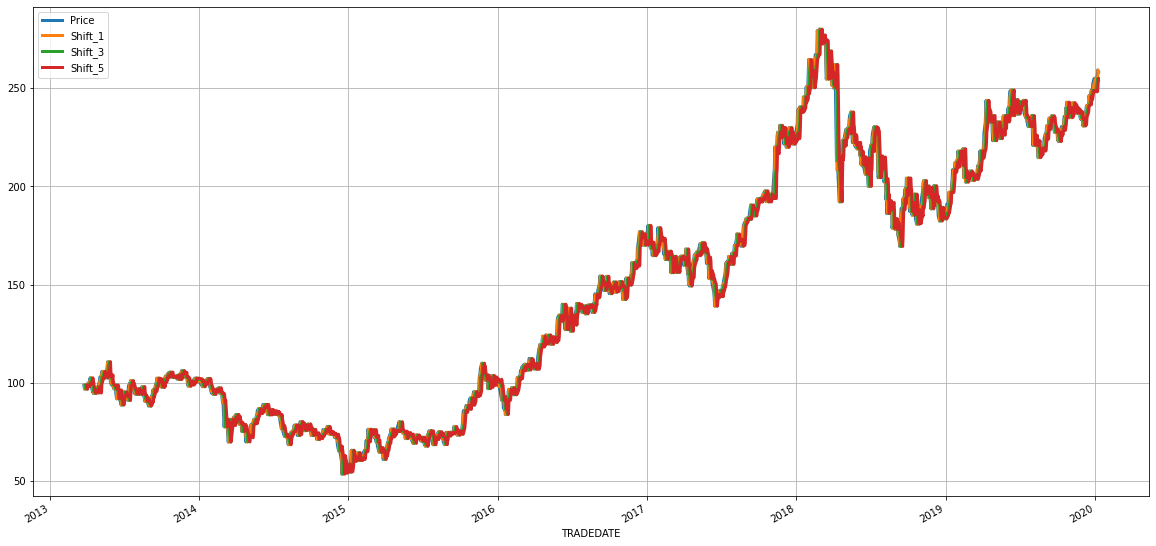

In [218]:
ts_df.plot(figsize=(20, 10), linewidth=3, grid=True)

In [219]:
ts_df['rolling_mean_1'] = ts.rolling(window=1).mean()
ts_df['rolling_mean_3'] = ts.rolling(window=3).mean()
ts_df['rolling_mean_5'] = ts.rolling(window=5).mean()
ts_df['rolling_median_1'] = ts.rolling(window=1).median()
ts_df['rolling_median_3'] = ts.rolling(window=3).median()
ts_df['rolling_median_5'] = ts.rolling(window=5).median()
ts_df['rolling_max_1'] = ts.rolling(window=1).max()
ts_df['rolling_max_3'] = ts.rolling(window=3).max()
ts_df['rolling_max_5'] = ts.rolling(window=5).max()
ts_df['rolling_min_1'] = ts.rolling(window=1).min()
ts_df['rolling_min_3'] = ts.rolling(window=3).min()
ts_df['rolling_min_5'] = ts.rolling(window=5).min()
ts_df['rolling_std_1'] = ts.rolling(window=1).std()
ts_df['rolling_std_3'] = ts.rolling(window=3).std()
ts_df['rolling_std_5'] = ts.rolling(window=5).std()

In [226]:
ts_df[['Выходной', 'Праздник', 'Предпраздничный рабочий день', 'Последний день месяца',
       'Последний рабочий день месяца', 'Пн', 'Вт', 'Ср', 'Чт', 'Пт',
       'Сб', 'Вс', 'Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь',
       'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь',
       'Предновогодний выходной день']] = result_df[['Выходной', 'Праздник',
       'Предпраздничный рабочий день', 'Последний день месяца',
       'Последний рабочий день месяца', 'Пн', 'Вт', 'Ср', 'Чт', 'Пт',
       'Сб', 'Вс', 'Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь',
       'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь',
       'Предновогодний выходной день']]

In [227]:
ts_df

,Price,Shift_1,Shift_3,Shift_5,rolling_mean_1,rolling_mean_3,rolling_mean_5,rolling_median_1,rolling_median_3,rolling_median_5,rolling_max_1,rolling_max_3,rolling_max_5,rolling_min_1,rolling_min_3,rolling_min_5,rolling_std_1,rolling_std_3,rolling_std_5,Выходной,Праздник,Предпраздничный рабочий день,Последний день месяца,Последний рабочий день месяца,Пн,Вт,Ср,Чт,Пт,Сб,Вс,Январь,Февраль,Март,Апрель,Май,Июнь,Июль,Август,Сентябрь,Октябрь,Ноябрь,Декабрь,Предновогодний выходной день
TRADEDATE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-03-25,98.79,NaN,NaN,NaN,98.79,NaN,NaN,98.79,NaN,NaN,98.79,NaN,NaN,98.79,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2013-03-26,97.20,98.79,NaN,NaN,97.20,NaN,NaN,97.20,NaN,NaN,97.20,NaN,NaN,97.20,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2013-03-27,96.75,97.20,NaN,NaN,96.75,97.580000,NaN,96.75,97.20,NaN,96.75,98.79,NaN,96.75,96.75,NaN,NaN,1.071774,NaN,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2013-03-28,98.59,96.75,98.79,NaN,98.59,97.513333,NaN,98.59,97.20,NaN,98.59,98.59,NaN,98.59,96.75,NaN,NaN,0.959184,NaN,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2013-03-29,98.76,98.59,97.20,NaN,98.76,98.033333,98.018,98.76,98.59,98.59,98.76,98.76,98.79,98.76,96.75,96.75,NaN,1.114645,0.968334,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-03,255.00,254.75,248.24,248.67,255.00,253.936667,251.618,255.00,254.75,252.06,255.00,255.00,255.00,255.00,252.06,248.04,NaN,1.630041,3.378449,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-06,253.90,255.00,252.06,248.04,253.90,254.550000,252.790,253.90,254.75,253.90,253.90,255.00,255.00,253.90,253.90,248.24,NaN,0.576628,2.792544,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-08,259.15,253.90,254.75,248.24,259.15,256.016667,254.972,259.15,255.00,254.75,259.15,259.15,259.15,259.15,253.90,252.06,NaN,2.768724,2.604548,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


Пока не понимаю, то ли я сделал. И как полученное вертеть...